# Hands-on with the SDSS database (CasJobs)

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from astropy.table import Table

In [3]:
field1 = Table.read('field1_mjuric2.fit')

In [5]:
field1[:10]

objid,l,b,Ar,g,r,gErr,Column1,flags
int64,float64,float64,float32,float32,float32,float32,float32,int64
1237680502895411476,94.0156204064,-24.0597255437,0.169935,17.02,16.5866,0.00448013,0.00446085,35253360136208
1237680502895411888,94.0194268312,-24.0557383294,0.170626,19.9807,19.1704,0.0197801,0.0136489,68988044032
1237680502895411470,94.0150005157,-24.0556641459,0.170648,16.7239,16.2172,0.00411418,0.0041405,68987912704
1237680502895411475,94.0158822152,-24.0645132455,0.169103,14.2485,14.7208,0.00371583,0.0109408,202312555827216
1237680502895412374,94.0243235537,-24.0603958684,0.169571,21.8242,21.247,0.0819348,0.065981,68987912448
1237680502895411477,94.0186942953,-24.065669768,0.168873,21.0386,20.068,0.0438189,0.0252185,175990848754448
1237680502895411776,94.0224809055,-24.0500217391,0.171474,23.9334,22.5517,0.435131,0.194558,35259836006672
1237680502895411785,94.0254726792,-24.0670856741,0.168352,21.1935,20.8015,0.0486659,0.0453536,35253360132368
1237680502895411786,94.0243087229,-24.0683595803,0.168191,24.6283,22.0432,0.592339,0.128413,175993029525776


Let's quickly visualize what we got

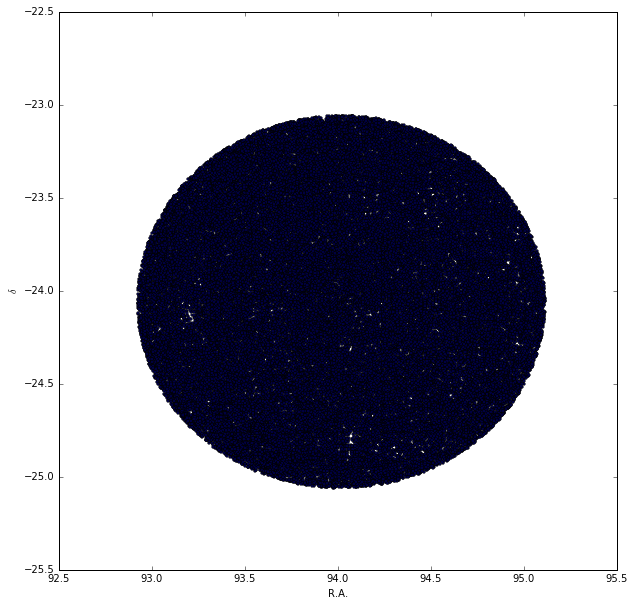

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(field1['l'], field1['b'], marker='.')

ax.set_xlabel("R.A.")
ax.set_ylabel("$\delta$")

Make the dots thinner:

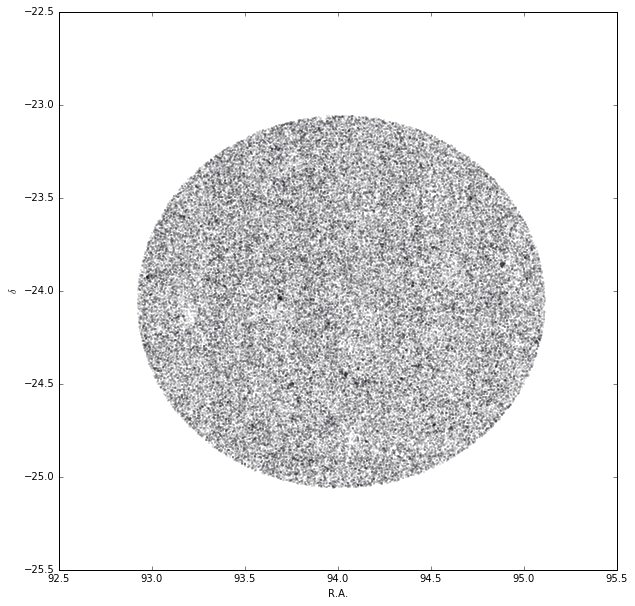

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(field1['l'], field1['b'], marker='.', s=0.1)

ax.set_xlabel("R.A.")
ax.set_ylabel("$\delta$")

Now plot the CMD

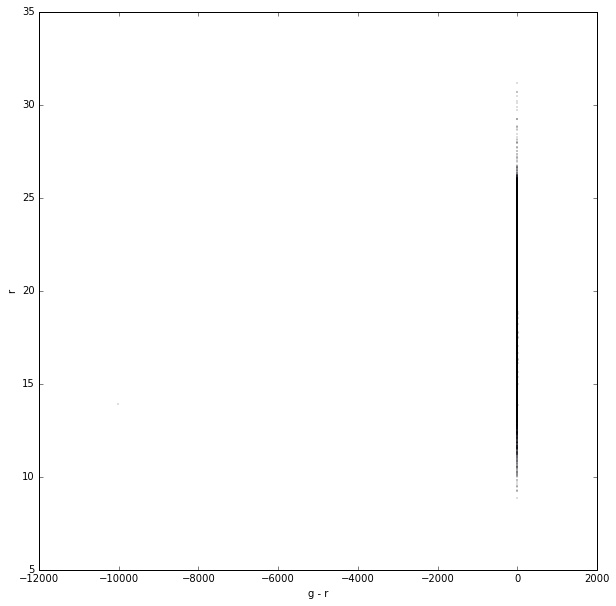

In [13]:
g = field1['g']
r = field1['r']
gr = g - r

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(gr, r, marker='.', s = 0.1)

ax.set_xlabel("g - r")
ax.set_ylabel("r")

Argh, missing values! Let's filter them out...

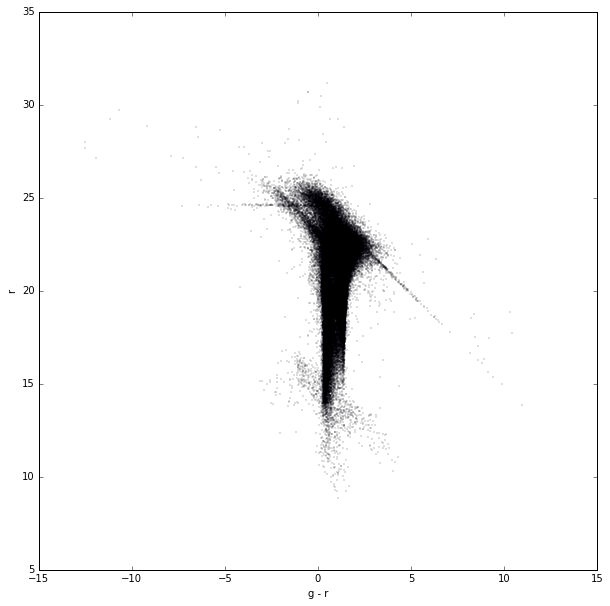

In [14]:
field1 = field1[(field1['g'] > 0) & (field1['r'] > 0)]

g = field1['g']
r = field1['r']
gr = g - r

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(gr, r, marker='.', s = 0.1)

ax.set_xlabel("g - r")
ax.set_ylabel("r")

Invert axis, tighten limits:

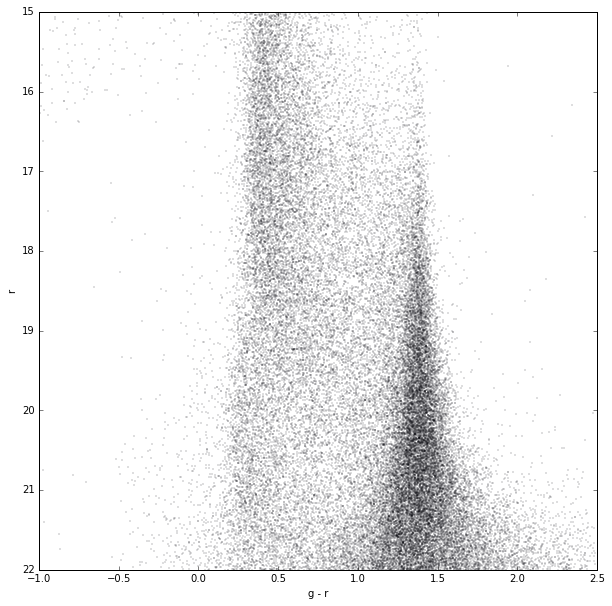

In [15]:
field1 = field1[(field1['g'] > 0) & (field1['r'] > 0)]

g = field1['g']
r = field1['r']
gr = g - r

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(gr, r, marker='.', s = 0.1)

ax.set_xlim(-1, 2.5)
ax.set_ylim(15, 22)

ax.invert_yaxis()

ax.set_xlabel("g - r")
ax.set_ylabel("r")

Now read in the second field:

In [22]:
field2 = Table.read('field2_mjuric2.fit')

Before we plot this one, let's turn our plotting code into a function

In [20]:
def add_cmd(ax, data):
    data = data[(data['g'] > 0) & (data['r'] > 0)]

    g = data['g']
    r = data['r']
    gr = g - r

    ax.scatter(gr, r, marker='.', s = 0.1)

    ax.set_xlim(-1, 2.5)
    ax.set_ylim(15, 22)

    ax.invert_yaxis()

    ax.set_xlabel("g - r")
    ax.set_ylabel("r")

verify it works as expected...

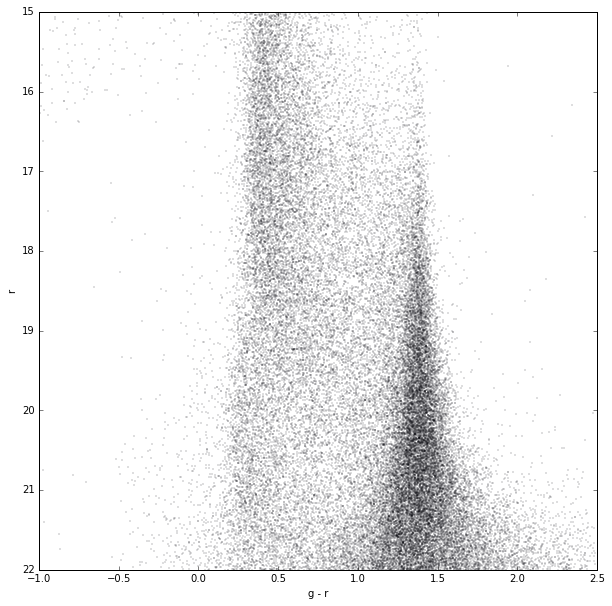

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
add_cmd(ax, field1)

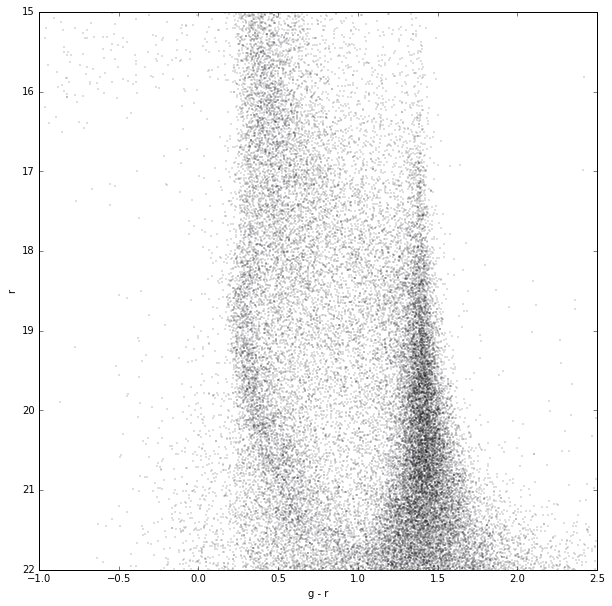

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
add_cmd(ax, field2)

Now both on the same plot...

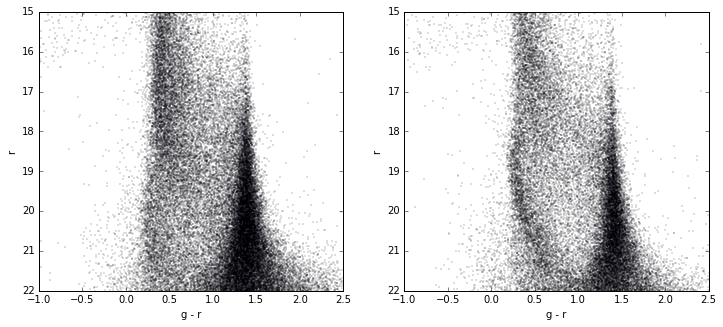

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
add_cmd(ax[0], field1)
add_cmd(ax[1], field2)

Now show the distribution of stars selected from a small box in (g-r, r) color magnitude diagram:

In [34]:
sky = Table.read('northfiltered_mjuric2.fit')

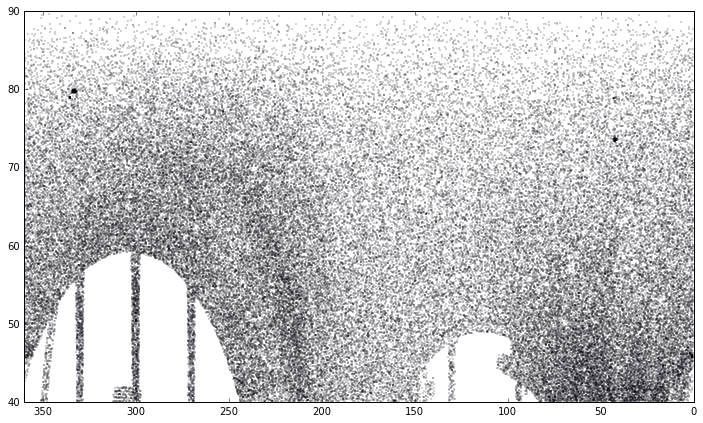

In [52]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 360)
ax.set_ylim(40, 90)
ax.invert_xaxis()
ax.scatter(sky['l'], sky['b'], s=.2, marker='.')
#ax.hexbin(sky['l'], sky['b'], gridsize=150)

Now plot it in the equatorial coordinate system:

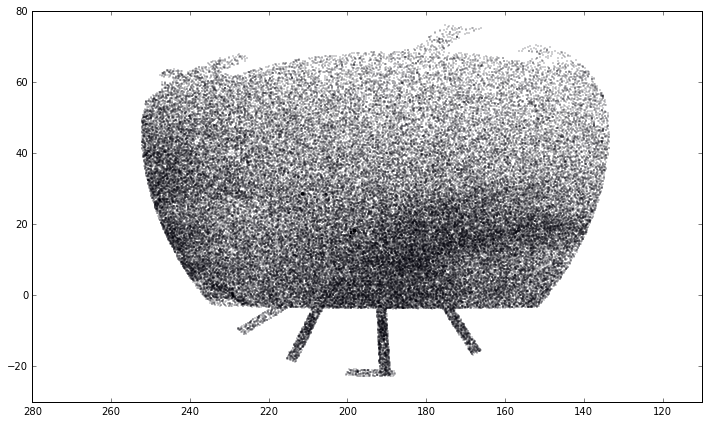

In [70]:
from astropy.coordinates import SkyCoord, Galactic
pos = SkyCoord(frame="galactic", l=sky['l'], b=sky['b'], unit="deg")

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(110, 280)
ax.set_ylim(-30, 80)
ax.invert_xaxis()
ax.scatter(pos.icrs.ra, pos.icrs.dec, s=.2, marker='.')